In [45]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

#Team Contract
#Decide one a Stakeholder
#EDA
#Plot, look into outliers,nulls
#Decide which predictors to use for the single model and the other model 

In [46]:
df = pd.read_csv('kc_house_data.csv')

In [131]:
df = df.loc[df['bedrooms'] < 7]

In [132]:
# exploratory
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [265]:
#Creating functions for Assumptions!
#LINEARITY FUNCTION
# THE RELATIONSHIP BETWEEN THE TARGET AND PREDICTOR SHOULD BE LINEAR
def linearity_test(endog, exog):
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    fig, ax = plt.subplots()
    ax.scatter(predictions, residuals)
    ax.set_xlabel('predicted Y')
    ax.set_ylabel('residual values')
    plt.suptitle('Residuals Vs. Predictions');

In [276]:
# INDEPENDENCE FUNCTION
def independence_test_DW(endog,exog):
    ''' POarameters Taken: endog, exog
        Returns: the durbin Watson Test Statistic
        Details: The Durbin-Watson test statistic is calculated on the null hypothesis that there is no correlation among the errors. 
        The test statistic has a range of 0 to 4, where 2 indicates no correlation, a score less than 2 indicates a positive correlation, and a score greater than 2 indicates a negative correlation.
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    dw = sm.stats.stattools.durbin_watson
    return dw(residuals)

In [277]:
def normality_test(endog,exog):
    ''' Checking that the errors are normally distibuted.
    The test statistic of the Jarque-Bera test is always a positive number and if it’s far from zero, it indicates that the sample data do not have a normal distribution.
    Omnibus P value : A minimum value of 1000 is recommended. Multiple-testing correction provides Bonferroni correction and false discovery rate (FDR). A significance level must be specified in the significance level (a).
    '''
    model = sm.OLS(endog=endog, exog=exog).fit()
    return model.summary().tables[2]

In [278]:
def homoskedasticity_test(endog,exog):
    ''' Often when errors are heteroskedastic they will be greater for greater values of the target. If the target has an exponential distribution, with lots of small values and few large values, then the model will tend to focus on the smaller values in calculating its betas, producing volatility for the higher end of the spectrum. And so we'll see greater divergence in the errors for larger values of the target.
    
    '''
    predictions = sm.OLS(endog=endog, exog=exog).fit().predict(exog)
    residuals = endog - predictions
    fig, ax = plt.subplots()
    ax.scatter(endog, residuals)
    ax.set_xlabel('Y values')
    ax.set_ylabel('Residual Values')
    plt.suptitle('Residuals Vs. Predictions');

In [279]:
simple_X = df['sqft_living']
simple_Y = df['price']
simple_X_cons = sm.add_constant(simple_X)
simple_model = sm.OLS(endog = simple_Y, exog = simple_X_cons).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.075e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:40:10   Log-Likelihood:            -2.9815e+05
No. Observations:               21472   AIC:                         5.963e+05
Df Residuals:                   21470   BIC:                         5.963e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.342e+04   4412.719     -9.840      0.000   -5.21e+04   -3.48e+04
sqft_living   280.6501      1.948    144.061      0.000     276.832     284.469
==============================================================================
Omnibus:                    14644.608   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           525942.628
Skew:                           2.806   Prob(JB):                         0.00
Kurtosis:                      26.588   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

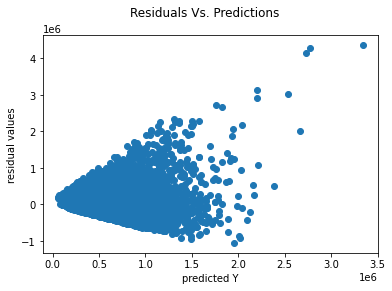

In [275]:
#Checking model for assumptions
linearity_test(simple_Y, simple_X_cons)

In [280]:
independence_test_DW(simple_Y, simple_X_cons)

1.9796455882729438

In [281]:
normality_test(simple_Y, simple_X_cons)

Omnibus:,14644.608,Durbin-Watson:,1.980
Prob(Omnibus):,0.000,Jarque-Bera (JB):,525942.628
Skew:,2.806,Prob(JB):,0.00
Kurtosis:,26.588,Cond. No.,5.64e+03


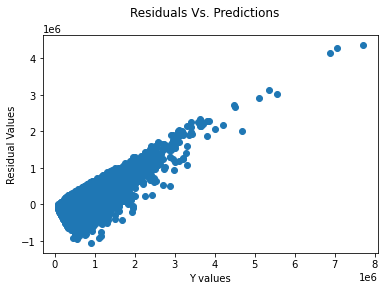

In [282]:
homoskedasticity_test(simple_Y, simple_X_cons)

In [176]:
df['floors'].isna().sum()

0

In [133]:
df = df.dropna(subset=['view'])

In [134]:
ids = df['id']

dups = df[ids.isin(ids[ids.duplicated()])].sort_values('id')
dups

#We have decided to keep duplicate Ids because they have different prices and its more data for our model

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,NO,NONE,...,0.0,1991,0,98002,47.3262,-122.214,2060,7316,2015,24
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,NONE,...,0.0,1991,0,98002,47.3262,-122.214,2060,7316,2014,23
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,NO,NONE,...,0.0,1925,0,98055,47.4840,-122.211,1480,6969,2014,89
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,NO,NONE,...,0.0,1925,0,98055,47.4840,-122.211,1480,6969,2015,90
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,NO,NONE,...,0.0,1980,0,98023,47.2977,-122.367,1830,6956,2014,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/2014,260000.0,2,1.00,700,4800,1.0,NO,NONE,...,0.0,1922,0,98122,47.6147,-122.300,1440,4800,2014,92
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,NO,NONE,...,700.0,1904,0,98144,47.5750,-122.288,1360,4080,2015,111
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,NO,NONE,...,?,1904,0,98144,47.5750,-122.288,1360,4080,2014,110
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,NO,NONE,...,1040.0,1962,0,98144,47.5720,-122.290,1340,4080,2014,52


In [135]:
df.duplicated().sum()
#There are no actual duplicates

0

In [136]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
#Removing nulls from yr renovated assuming its 0

In [137]:
df['yr_renovated'] = df['yr_renovated'].astype(int)
#Making years intergers for calculations of age

In [138]:
df['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21472, dtype: int64

In [139]:
df['date_yr'] = pd.DatetimeIndex(df['date']).year
#turning sale dates into years for age calculation to associate age with model

In [140]:
df['date_yr']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: date_yr, Length: 21472, dtype: int64

In [141]:
df['age'] = 0

In [142]:
def age(renovated, built, year, age): 
    if renovated < 1:
        age = year - built
    else: age = year - renovated
    
    return age
        

In [143]:
def age2(row):
    if row['yr_renovated'] < 1:
        return  row['date_yr'] - row['yr_built']
    else:
        return row['date_yr']- row['yr_renovated']
        

In [144]:
df.apply(age2, axis=1)

0        59
1        23
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Length: 21472, dtype: int64

In [145]:
df2 = df.copy

In [146]:
df['age2'] = df.apply(age2, axis=1)

In [147]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age,age2
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,0,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,0,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,0,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,0,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,0,28


In [148]:
df['yr_renovated'].value_counts()

0       20735
2014       73
2013       30
2007       30
2003       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [149]:
df['yr_built'].isna().sum()

0

In [150]:
df['yr_built'].value_counts()

2014    558
2006    453
2005    448
2004    429
2003    419
       ... 
1933     30
1901     27
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [151]:
df['age'] = df['age2']

In [152]:
df = df.drop('age2', axis=1)

In [153]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_yr,age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,2014,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [154]:
df_nums = df[['price', 'bedrooms', 'age', 'sqft_living', 'floors']]

In [155]:
df_nums.isna().sum()


price          0
bedrooms       0
age            0
sqft_living    0
floors         0
dtype: int64

In [180]:
df_nums.shape

(21472, 5)

In [156]:
df_scale = df_nums.drop('price',axis=1)

In [177]:
df_scale

,bedrooms,age,sqft_living,floors
0,3,59,1180,1.0
1,3,23,2570,2.0
2,2,82,770,1.0
3,4,49,1960,1.0
4,3,28,1680,1.0
...,...,...,...,...
21592,3,5,1530,3.0
21593,4,1,2310,2.0
21594,2,5,1020,2.0
21595,3,11,1600,2.0


In [238]:
df_price = df_nums['price']
df_price.shape

(21472,)

In [239]:
#scaling to adjust for standard scaler!
df_price = df_price.reset_index(drop=True)
df_price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21467    360000.0
21468    400000.0
21469    402101.0
21470    400000.0
21471    325000.0
Name: price, Length: 21472, dtype: float64

In [240]:
ss = StandardScaler()

ss.fit(df_scale)

df_scale.head()

,bedrooms,age,sqft_living,floors
0,3,59,1180,1.0
1,3,23,2570,2.0
2,2,82,770,1.0
3,4,49,1960,1.0
4,3,28,1680,1.0


In [241]:
df_scaled_new = ss.transform(df_scale)
df_scaled_new

array([[-0.41093946,  0.6101104 , -0.98430561, -0.91434926],
       [-0.41093946, -0.63404085,  0.5448856 ,  0.9388608 ],
       [-1.55375672,  1.40498481, -1.43536201, -0.91434926],
       ...,
       [-1.55375672, -1.25611647, -1.16032762,  0.9388608 ],
       [-0.41093946, -1.04875793, -0.52224783,  0.9388608 ],
       [-1.55375672, -1.22155672, -1.16032762,  0.9388608 ]])

In [242]:
df_scaled_new = pd.DataFrame(df_scaled_new, columns=df_scale.columns)
df_scaled_new

,bedrooms,age,sqft_living,floors
0,-0.410939,0.610110,-0.984306,-0.914349
1,-0.410939,-0.634041,0.544886,0.938861
2,-1.553757,1.404985,-1.435362,-0.914349
3,0.731878,0.264513,-0.126198,-0.914349
4,-0.410939,-0.461242,-0.434237,-0.914349
...,...,...,...,...
21467,-0.410939,-1.256116,-0.599257,2.792071
21468,0.731878,-1.394356,0.258850,0.938861
21469,-1.553757,-1.256116,-1.160328,0.938861
21470,-0.410939,-1.048758,-0.522248,0.938861


In [243]:
new_df = pd.concat([df_price, df_scaled_new], axis=1)

In [244]:
new_df

,price,bedrooms,age,sqft_living,floors
0,221900.0,-0.410939,0.610110,-0.984306,-0.914349
1,538000.0,-0.410939,-0.634041,0.544886,0.938861
2,180000.0,-1.553757,1.404985,-1.435362,-0.914349
3,604000.0,0.731878,0.264513,-0.126198,-0.914349
4,510000.0,-0.410939,-0.461242,-0.434237,-0.914349
...,...,...,...,...,...
21467,360000.0,-0.410939,-1.256116,-0.599257,2.792071
21468,400000.0,0.731878,-1.394356,0.258850,0.938861
21469,402101.0,-1.553757,-1.256116,-1.160328,0.938861
21470,400000.0,-0.410939,-1.048758,-0.522248,0.938861


In [245]:
df_cat = df[['view','condition','grade']]

In [246]:
df_cats = pd.get_dummies(df_cat)
df_cats

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [247]:
df_cats.columns

Index(['view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [248]:
df_cats

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [249]:
#figuring out which ones to drop!!
df['view'].value_counts()

NONE         19371
AVERAGE        952
GOOD           507
FAIR           327
EXCELLENT      315
Name: view, dtype: int64

In [250]:
#figuring out which ones to drop!!
df['grade'].value_counts()

7 Average        8923
8 Good           6036
9 Better         2598
6 Low Average    2030
10 Very Good     1124
11 Excellent      392
5 Fair            242
12 Luxury          86
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [251]:
#figuring out which ones to drop!!
df['condition'].value_counts()

Average      13940
Good          5643
Very Good     1690
Fair           170
Poor            29
Name: condition, dtype: int64

In [252]:
df_cats = df_cats.drop(['condition_Average', 'view_NONE','grade_7 Average'], axis=1)

In [253]:
df_cats.reset_index(inplace=True, drop=True)

In [254]:
#concating dummies

new_set = pd.concat([new_df, df_cats], axis=1)

In [255]:
new_df.shape

(21472, 5)

In [256]:
new_set

,price,bedrooms,age,sqft_living,floors,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Fair,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
0,221900.0,-0.410939,0.610110,-0.984306,-0.914349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,-0.410939,-0.634041,0.544886,0.938861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,-1.553757,1.404985,-1.435362,-0.914349,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,0.731878,0.264513,-0.126198,-0.914349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.410939,-0.461242,-0.434237,-0.914349,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,360000.0,-0.410939,-1.256116,-0.599257,2.792071,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21468,400000.0,0.731878,-1.394356,0.258850,0.938861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21469,402101.0,-1.553757,-1.256116,-1.160328,0.938861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21470,400000.0,-0.410939,-1.048758,-0.522248,0.938861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [257]:
#testing model
y = new_set['price']

x = sm.add_constant(new_set.drop('price', axis=1))

model = sm.OLS(y,x)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1854.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:03:55   Log-Likelihood:            -2.9397e+05
No. Observations:               21472   AIC:                         5.880e+05
Df Residuals:                   21449   BIC:                         5.882e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.342e+05   2879.989    150.780      0.000    4.29e+05     4.4e+05
bedrooms             -2.19e+04   1898.711    -11.536      0.000   -2.56e+04   -1.82e+04
age                  7.406e+04   1936.802     38.238      0.000    7.03e+04    7.79e+04
sqft_living          1.483e+05   2800.467     52.944      0.000    1.43e+05    1.54e+05
floors               2.177e+04   1810.173     12.027      0.000    1.82e+04    2.53e+04
view_AVERAGE         7.156e+04   7247.214      9.874      0.000    5.74e+04    8.58e+04
view_EXCELLENT       4.957e+05   1.25e+04     39.713      0.000    4.71e+05     5.2e+05
view_FAIR            1.407e+05    1.2e+04     11.717      0.000    1.17e+05    1.64e+05
view_GOOD            1.481e+05   9834.526     15.059      0.000    1.29e+05    1.67e+05
condition_Fair      -3.364e+04   1.67e+04     -2.017      0.044   -6.63e+04    -950.337
condition_Good       1.502e+04   3663.715      4.099      0.000    7837.743    2.22e+04
condition_Poor      -3.567e+04   4.01e+04     -0.890      0.373   -1.14e+05    4.29e+04
condition_Very Good  6.706e+04   5881.718     11.402      0.000    5.55e+04    7.86e+04
grade_10 Very Good   3.914e+05   8608.328     45.465      0.000    3.75e+05    4.08e+05
grade_11 Excellent   6.554e+05   1.34e+04     48.752      0.000    6.29e+05    6.82e+05
grade_12 Luxury      1.094e+06   2.55e+04     42.977      0.000    1.04e+06    1.14e+06
grade_13 Mansion     2.295e+06   6.15e+04     37.315      0.000    2.17e+06    2.42e+06
grade_3 Poor        -1.622e+05   2.14e+05     -0.758      0.448   -5.81e+05    2.57e+05
grade_4 Low         -1.218e+05   4.14e+04     -2.939      0.003   -2.03e+05   -4.06e+04
grade_5 Fair         -1.32e+05   1.43e+04     -9.265      0.000    -1.6e+05   -1.04e+05
grade_6 Low Average -8.141e+04   5566.768    -14.624      0.000   -9.23e+04   -7.05e+04
grade_8 Good         8.754e+04   4016.745     21.794      0.000    7.97e+04    9.54e+04
grade_9 Better       2.159e+05   6010.454     35.916      0.000    2.04e+05    2.28e+05
==============================================================================
Omnibus:                    13601.157   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           637009.566
Skew:                           2.419   Prob(JB):                         0.00
Kurtosis:                      29.241   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

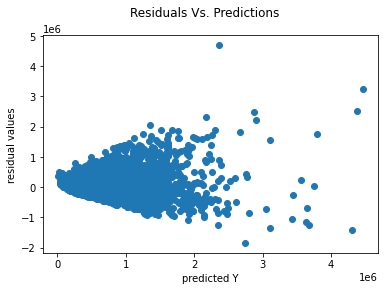

In [283]:
linearity_test(y,x)

In [284]:
independence_test_DW(y,x)

1.9823705239056595

In [285]:
normality_test(y,x)

Omnibus:,13601.157,Durbin-Watson:,1.982
Prob(Omnibus):,0.000,Jarque-Bera (JB):,637009.566
Skew:,2.419,Prob(JB):,0.00
Kurtosis:,29.241,Cond. No.,214.


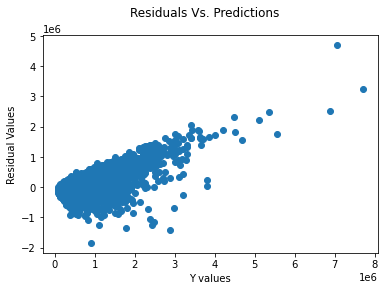

In [286]:
homoskedasticity_test(y,x)

In [289]:
new_set.corr()

,price,bedrooms,age,sqft_living,floors,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Fair,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
price,1.000000,0.312755,-0.100427,0.701082,0.254739,0.147009,0.305767,0.092909,0.184827,-0.051720,...,0.342355,0.356850,0.281280,0.214556,-0.005192,-0.031872,-0.085185,-0.210542,0.006222,0.239193
bedrooms,0.312755,1.000000,-0.180561,0.593033,0.182579,0.045941,0.033968,0.020607,0.053873,-0.051124,...,0.141903,0.118091,0.059051,0.041815,-0.018403,-0.071652,-0.118494,-0.249756,0.080100,0.171819
age,-0.100427,-0.180561,1.000000,-0.344838,-0.503504,0.038528,0.001753,0.028807,0.001160,0.072737,...,-0.152061,-0.099879,-0.046578,-0.012727,0.012654,0.042541,0.134742,0.319050,-0.208363,-0.228302
sqft_living,0.701082,0.593033,-0.344838,1.000000,0.352287,0.133381,0.164523,0.066106,0.160702,-0.064264,...,0.371083,0.345719,0.227599,0.146447,-0.011673,-0.054415,-0.128191,-0.314150,0.073516,0.323465
floors,0.254739,0.182579,-0.503504,0.352287,1.000000,0.007671,0.024108,-0.024552,0.020380,-0.055388,...,0.173771,0.117714,0.049971,0.021354,-0.006240,-0.030008,-0.080452,-0.230409,0.202248,0.245247
view_AVERAGE,0.147009,0.045941,0.038528,0.133381,0.007671,1.000000,-0.026282,-0.026786,-0.033495,-0.011583,...,0.050960,0.063578,0.032910,0.022292,-0.001470,-0.001258,-0.010137,-0.037121,0.028881,0.049821
view_EXCELLENT,0.305767,0.033968,0.001753,0.164523,0.024108,-0.026282,1.000000,-0.015174,-0.018975,-0.010900,...,0.084369,0.081737,0.114923,0.044239,-0.000833,-0.004330,0.001651,-0.023541,-0.012537,0.040250
view_FAIR,0.092909,0.020607,0.028807,0.066106,-0.024552,-0.026786,-0.015174,1.000000,-0.019339,-0.006818,...,0.015166,0.031333,0.004156,-0.003061,-0.000849,0.017050,-0.006072,-0.020686,0.012755,0.026162
view_GOOD,0.184827,0.053873,0.001160,0.160702,0.020380,-0.033495,-0.018975,-0.019339,1.000000,-0.006970,...,0.076376,0.081893,0.038702,0.021111,-0.001061,-0.005518,-0.013697,-0.035573,0.002372,0.063632
condition_Fair,-0.051720,-0.051124,0.072737,-0.064264,-0.055388,-0.011583,-0.010900,-0.006818,-0.006970,1.000000,...,-0.016277,-0.012182,-0.005665,-0.002199,-0.000610,0.056144,0.065132,0.077101,-0.040666,-0.029921
